# Group Project Stats: Mixture of regression model
by Polina, Livia, Buelent and Antonios

In [3]:
#Importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set_theme(style="darkgrid")


# Part 1: Creating the synthetic data set

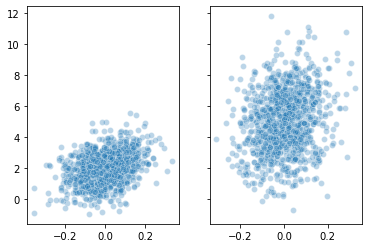

In [4]:
x1 = np.random.normal(0, 0.1, 1000)
x2 = np.random.normal(0, .1, 1000)

y1 = x1 * 3 + 2 + np.random.normal(0, 1, 1000) 
y2 = x2 * 4 + 5 + np.random.normal(0, 2, 1000)


fig, ax =plt.subplots(1,2, sharey=True)
sns.scatterplot(x=x1, y=y1, alpha=0.3,ax=ax[0])
sns.scatterplot(x=x2, y=y2, alpha=0.3,ax=ax[1])

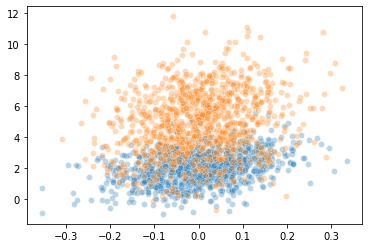

In [5]:
sns.scatterplot(x=x1, y=y1, alpha=0.3)
sns.scatterplot(x=x2, y=y2, alpha=0.3)

# Part 2: Theoretical considerations and the EM algorithm 

## Working out the math

General Framework:

$$ y_i|x_i,z_i,\Theta \sim \mathcal{N}(\beta_{0j} + \beta_{1j} x_i,\sigma^{2}_{zi}) $$ 

$$ z_i \in \{1,2\} $$

$$ p(z_i = j) = \pi_j = 0.5 $$

$$ \Theta = (\beta_{01}, \beta_{11}, \beta_{02}, \beta_{12}, \sigma^{2}_{1},\sigma^{2}_{2}, \pi_1, \pi_2) $$

Given this framework, the joined density of the latent variable $\mathbf{z}$ and $\mathbf{y} $ are given by:

$$ p(y_1,..., y_n, z_1,z_2 | \Theta) = \prod^N_{i=1} p(y_i|z_i,x_i,\Theta) p(z_i)$$

$$ p(\mathbf{z}|\mathbf{y},\Theta) = \prod^N_{i=1} p(z_i|y_i, x_i,\Theta) $$

Now, via Bayes Theorem we can approximate:

$$ p(z_i|y_i,x_i,\Theta) \propto p(y_i|z_i=j, x_i, \Theta)p(z_i=j)$$

Since we know that:

$$ p(y_i|z_i,x_i,\Theta) = \frac{1}{\sqrt{2\pi\sigma^{2}_{zi}}} exp \{ -\frac{1}{2 \sigma^2_{zi}}(y_i-\beta_{0j} + \beta_{1j})^2\}$$

We can write the posterior distribution as:

$$ p(z_i|y_i,x_i,\Theta) \propto \pi_j \frac{1}{\sqrt{2\pi\sigma^{2}_{zi}}} exp \{ -\frac{1}{2 \sigma^2_{zi}}(y_i-\beta_{0j} + \beta_{1j})^2\}$$

